In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score 

**ЗАДАНИЕ**

Дан класс, описывающий бинарное дерево.  
class Tree:    
    def __init__(self, data):       
        self.left = None       
        self.right = None       
        self.data = data    
    def PrintTree(self):       
        print(self.data)
        
Реализуйте в классе функцию для вставки нового элемента в дерево по следующим правилам:
• Левое поддерево узла содержит только узлы со значениями меньше, чем значение в узле.
• Правое поддерево узла содержит только узлы со значениями меньше, чем значение в узле.
• Каждое из левого и правого поддеревьев также должно быть бинарным деревом поиска.
• Не должно быть повторяющихся узлов. Метод вставки сравнивает значение узла с родительским узлом и решает куда доваить элемент (в левое или правое поддерево).

Перепишите, метод PrintTree для печати полной версии дерева.

In [7]:
#ЗАДАНИЕ
class Tree: 
    def __init__(self, data): 
        self.left = None 
        self.right = None 
        self.data = data
        
    def insert(self, value): 
        if value < self.data: 
            if self.left is None: 
                self.left = Tree(value) 
            else: 
                self.left.insert(value) 
        elif value > self.data: 
            if self.right is None: 
                self.right = Tree(value) 
            else: 
                self.right.insert(value) 
    def PrintTree(self): 
        if self.left: 
            self.left.PrintTree() 
        print(self.data) 
        if self.right: 
            self.right.PrintTree() 

my_tree = Tree(5) 
my_tree.insert(3) 
my_tree.insert(7) 
my_tree.insert(2) 
my_tree.insert(4) 
my_tree.insert(6)
my_tree.insert(8)
my_tree.PrintTree()

2
3
4
5
6
7
8


**ЗАДАНИЕ**

Постройте классификатор на основе дерева принятия решений следующего датасета: 

In [8]:
#ЗАДАНИЕ

# Данные 
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]]) 
target = [0, 0, 0, 1, 1, 1] 

# Создание классификатора на основе дерева принятия решений 
clf = DecisionTreeClassifier() 

# Обучение классификатора 
clf.fit(X, target) 

# Пример предсказания для новых данных 
new_data_point = np.array([[0, 0]]) 
prediction = clf.predict(new_data_point) 
print(f"Предсказание для новых данных {new_data_point}: {prediction}")

Предсказание для новых данных [[0 0]]: [0]


**ЗАДАНИЕ**

Постройте модель регрессии для данных из предыдущей рабочей тетради.Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина: 
https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv 
Постройте прогноз. Оцените точность модели. 

   Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410  
Mean Squared Error: 4083.2558717453767
R-squared: 0.3913664001428886


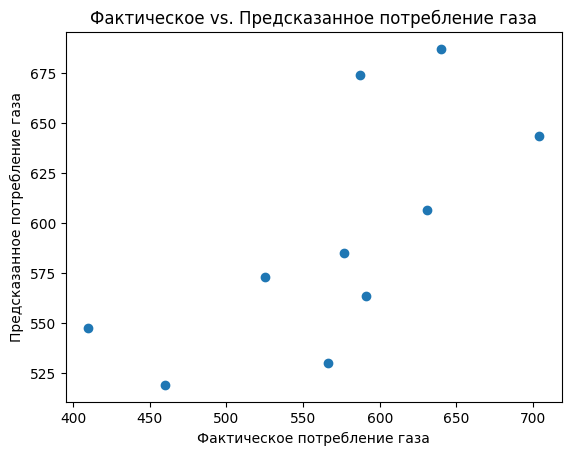

In [9]:
#ЗАДАНИЕ

# Загрузка данных 
url = "https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv" 
data = pd.read_csv(url) 

# Посмотрим на первые несколько строк данных
print(data.head())

# Выбор признаков и целевой переменной 
X = data.drop('Petrol_Consumption', axis=1) 
y = data['Petrol_Consumption'] 

# Разделение данных на тренировочный и тестовый наборы 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели
model = LinearRegression() 

# Обучение модели на тренировочных данных 
model.fit(X_train, y_train) 

# Предсказание на тестовых данных 
y_pred = model.predict(X_test)

# Оценка точности модели 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 

print(f'Mean Squared Error: {mse}') 
print(f'R-squared: {r2}')

# Визуализация фактических vs. предсказанных значений 
plt.scatter(y_test, y_pred) 
plt.xlabel('Фактическое потребление газа') 
plt.ylabel('Предсказанное потребление газа') 
plt.title('Фактическое vs. Предсказанное потребление газа') 
plt.show()